In [32]:
import numpy as np
import pandas as pd

In [33]:
df=pd.read_csv('Day041_newplacementdata.csv')

In [34]:
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26,1
1,7.46,38,1
2,7.54,40,1
3,6.42,8,1
4,7.23,17,0


In [35]:
# even =((n/2)+((n/2)+1))/2
# odd ((n/2)+1)

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: xlabel='placement_exam_marks'>

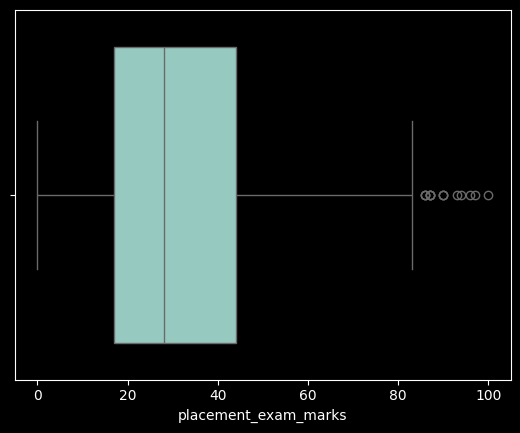

In [38]:
sns.boxplot(x=df['placement_exam_marks'])

In [39]:
# Finding the IRQ
percentile25=df['placement_exam_marks'].quantile(0.25)
percentile75=df['placement_exam_marks'].quantile(0.75)

In [40]:
percentile25

np.float64(17.0)

In [41]:
percentile75

np.float64(44.0)

In [42]:
IQR= percentile75 - percentile25
IQR

np.float64(27.0)

In [43]:
upper_limit=percentile75+1.5*IQR
upper_limit

np.float64(84.5)

In [44]:
lower_limit=percentile75 - 1.5*IQR
lower_limit

np.float64(3.5)

Finding Our Outliers

In [45]:
df[df['placement_exam_marks']>upper_limit]

,cgpa,placement_exam_marks,placed
9,7.75,94,1
40,6.60,86,1
61,7.51,86,0
134,6.33,93,0
162,7.80,90,0
283,7.09,87,0
290,8.38,87,0
311,6.97,87,1
324,6.64,90,0
630,6.56,96,1


In [46]:
df[df['placement_exam_marks']<lower_limit]


,cgpa,placement_exam_marks,placed
74,6.16,3,1
117,7.11,0,1
219,5.48,3,0
701,6.74,2,1
863,8.04,2,1
943,7.36,2,0


In [47]:
# Trimming --> 4(lower)...1, upper(25)...(50) --> here 1,50 are outliers -->
# lower(4) <---> upper(25) mid data 

# Capping --> 4(lower)...1, upper(25)...(50) -->capping lower point lowest point(1)
# upper point upper point(50) --> Range expand --> outliers remove

In [48]:
# Trimming (Outlier Removing technique 1)

In [49]:
newdf=df[df['placement_exam_marks']<upper_limit]

In [50]:
# newdf

In [51]:
# comparision

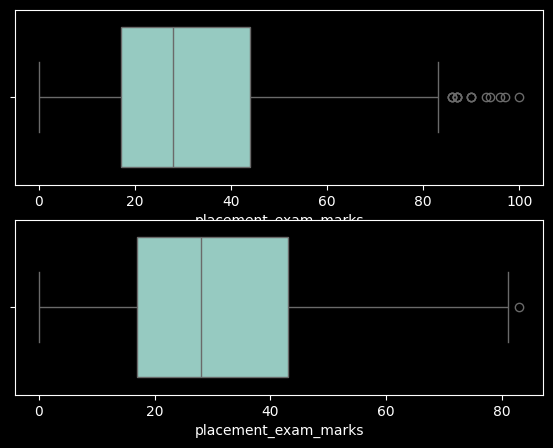

In [52]:
plt.figure(figsize=(15,5))

plt.subplot(222)
sns.boxplot(x=df['placement_exam_marks'])

plt.subplot(224)
sns.boxplot(x=newdf['placement_exam_marks'])
plt.show()

In [53]:
# Capping(Outlier removing technique 2)

In [54]:
new_df_cap=df.copy()

In [55]:
# min =5 , max=15

# min 4,3,1
# max 20,30,50

# updated_min_value=1
# updated_max_value=50

In [56]:
new_df_cap['placement_exam_marks']=np.where(
    new_df_cap['placement_exam_marks']>upper_limit,
    upper_limit,

    np.where(
        new_df_cap['placement_exam_marks']<lower_limit,
        lower_limit,
        new_df_cap['placement_exam_marks']
    )
)

In [57]:
new_df_cap

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0
...,...,...,...
995,8.87,44.0,1
996,9.12,65.0,1
997,4.89,34.0,0
998,8.62,46.0,1


In [58]:
new_df_cap.shape

(1000, 3)

In [59]:
# comparision

<Axes: xlabel='placement_exam_marks'>

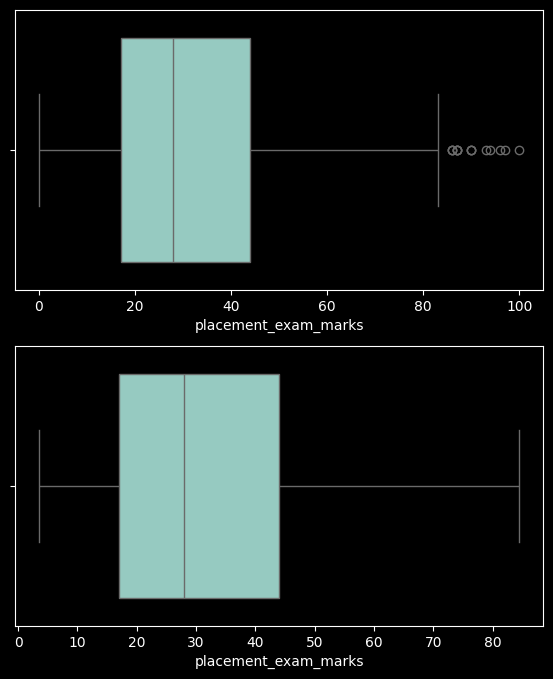

In [60]:
plt.figure(figsize=(15,8))

plt.subplot(222)
sns.boxplot(x=df['placement_exam_marks'])

plt.subplot(224)
sns.boxplot(x=new_df_cap['placement_exam_marks'])